In [1]:
!pip install mediapipe opencv-python pandas scikit-learn

In [2]:
import mediapipe as mp
import cv2
import numpy as np



In [3]:
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

In [4]:
cap = cv2.VideoCapture(0)

#Initialize holistic model
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, image = cap.read()
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
        results = pose.process(image)
        image.flags.writeable= True 
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS
                                      , mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                   mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                              )
        cv2.imshow('Raw Webcam Feed', image)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [5]:
cap = cv2.VideoCapture(0)
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
fps = cap.get(cv2.CAP_PROP_FPS)
videoWriter = cv2.VideoWriter('prses.avi', cv2.VideoWriter_fourcc('P','I','M','1'), fps, (int(width), int(height)))

while cap.isOpened():
    
    ret, frame = cap.read()
    
    try:
        cv2.imshow('Press', frame)
        videoWriter.write(frame)
    except Exception as e:
        break
        
    if cv2.waitKey(10) & 0xFF == ord('q'):     
        break
                
cap.release()
videoWriter.release()
cv2.destroyAllWindows()

In [6]:
import csv
import os
import numpy as np
from matplotlib import pyplot as plt

In [7]:
landmarks = ['class']

for val in range(1, 33+1):
    landmarks += ['x{}'.format(val), 'y{}'.format(val), 'z{}'.format(val), 'v{}'.format(val)]
    

In [8]:
landmarks[1:]

['x1',
 'y1',
 'z1',
 'v1',
 'x2',
 'y2',
 'z2',
 'v2',
 'x3',
 'y3',
 'z3',
 'v3',
 'x4',
 'y4',
 'z4',
 'v4',
 'x5',
 'y5',
 'z5',
 'v5',
 'x6',
 'y6',
 'z6',
 'v6',
 'x7',
 'y7',
 'z7',
 'v7',
 'x8',
 'y8',
 'z8',
 'v8',
 'x9',
 'y9',
 'z9',
 'v9',
 'x10',
 'y10',
 'z10',
 'v10',
 'x11',
 'y11',
 'z11',
 'v11',
 'x12',
 'y12',
 'z12',
 'v12',
 'x13',
 'y13',
 'z13',
 'v13',
 'x14',
 'y14',
 'z14',
 'v14',
 'x15',
 'y15',
 'z15',
 'v15',
 'x16',
 'y16',
 'z16',
 'v16',
 'x17',
 'y17',
 'z17',
 'v17',
 'x18',
 'y18',
 'z18',
 'v18',
 'x19',
 'y19',
 'z19',
 'v19',
 'x20',
 'y20',
 'z20',
 'v20',
 'x21',
 'y21',
 'z21',
 'v21',
 'x22',
 'y22',
 'z22',
 'v22',
 'x23',
 'y23',
 'z23',
 'v23',
 'x24',
 'y24',
 'z24',
 'v24',
 'x25',
 'y25',
 'z25',
 'v25',
 'x26',
 'y26',
 'z26',
 'v26',
 'x27',
 'y27',
 'z27',
 'v27',
 'x28',
 'y28',
 'z28',
 'v28',
 'x29',
 'y29',
 'z29',
 'v29',
 'x30',
 'y30',
 'z30',
 'v30',
 'x31',
 'y31',
 'z31',
 'v31',
 'x32',
 'y32',
 'z32',
 'v32',
 'x33',
 'y3

In [9]:
with open('cordis.csv', mode='w', newline='') as f:
    csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    csv_writer.writerow(landmarks)

In [10]:
def export_landmark(results, action):
    
    try:
        keypoints = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten().tolist()
        keypoints.insert(0, action)
        
        with open('cordis.csv', mode='a', newline='') as f:
            csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
            csv_writer.writerow(keypoints)
    except Exception as e:
        pass
    
    

In [11]:
results.pose_landmarks

landmark {
  x: 0.7353566884994507
  y: 0.7305572628974915
  z: -1.1839364767074585
  visibility: 0.9982790350914001
}
landmark {
  x: 0.7649994492530823
  y: 0.6639369130134583
  z: -1.0875798463821411
  visibility: 0.9957150220870972
}
landmark {
  x: 0.7815403342247009
  y: 0.6669380068778992
  z: -1.0875941514968872
  visibility: 0.9958805441856384
}
landmark {
  x: 0.7968939542770386
  y: 0.6702012419700623
  z: -1.0877461433410645
  visibility: 0.9928249716758728
}
landmark {
  x: 0.7060803174972534
  y: 0.6490689516067505
  z: -1.1330745220184326
  visibility: 0.9978023171424866
}
landmark {
  x: 0.6842240691184998
  y: 0.6414899230003357
  z: -1.1326079368591309
  visibility: 0.9986121654510498
}
landmark {
  x: 0.6624914407730103
  y: 0.6347563862800598
  z: -1.1332361698150635
  visibility: 0.9986679553985596
}
landmark {
  x: 0.7987135648727417
  y: 0.6981912851333618
  z: -0.5456412434577942
  visibility: 0.9942284226417542
}
landmark {
  x: 0.6100805997848511
  y: 0.658536

In [12]:
export_landmark(results, 'up')

In [13]:
cap = cv2.VideoCapture('C:\\Users\\hp\\prss.avi')
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    
    while cap.isOpened():
        
        ret, frame = cap.read()
        
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
        
        results = pose.process(image)
        
        image.flags.writeable= True 
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                               mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                               mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                              )
        k = cv2.waitKey(1)
        if k == 117:
            export_landmark(results, 'up')
        if k == 100:
            export_landmark(results, 'down')
            
        
        cv2.imshow('Raw Webcam Feed', image)
        
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [17]:
df = pd.read_csv('cords.csv')

In [18]:
import csv
import os
import numpy as np
from matplotlib import pyplot as plt
landmarks = ['class']


for val in range(1, 33+1) :
    landmarks += ['x{}'.format (val),'y{}' .format(val),'z{}'.format(val),'v{}'.format (val)]

In [19]:
with open('testdata.csv', mode='w', newline='') as f:
    csv_writer = csv.writer(f,delimiter=',',quotechar='"',quoting=csv.QUOTE_MINIMAL)
    csv_writer.writerow(landmarks)

In [22]:
import mediapipe as mp
mp_drawing=mp.solutions.drawing_utils
mp_pose=mp.solutions.pose
mp_holistic = mp.solutions.holistic # Mediapipe Solutions

In [65]:
#train up and down
cap = cv2.VideoCapture("C:\\Users\\hp\\OneDrive\\Desktop\\MYdataset\\train\\Back arching\\22.mp4")
# Initiate holistic model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor Feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False        
        # Make Detections
        results = holistic.process(image)
        # Recolor image back to BGR for rendering
        image.flags.writeable = True   
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        # Pose Detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                 )
        # Export coordinates
        try:
            # Extract Pose landmarks
            pose = results.pose_landmarks.landmark
            pose_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in pose]).flatten())
            
            # Concate rows
            row = pose_row
            
            # Append class name 
            row.insert(0, 'Back arching')
            
            # Export to CSV
            with open('traindata.csv', mode='a', newline='') as f:
                csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
                csv_writer.writerow(row) 
            
        except:
            pass
                        
        cv2.imshow('Raw Webcam Feed', image)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [100]:
#train up and down
cap = cv2.VideoCapture("C:\\Users\\hp\\OneDrive\\Desktop\\MYdataset\\train\\Low hip mobility\\50.mp4")
# Initiate holistic model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor Feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False        
        # Make Detections
        results = holistic.process(image)
        # Recolor image back to BGR for rendering
        image.flags.writeable = True   
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        # Pose Detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                 )
        # Export coordinates
        try:
            # Extract Pose landmarks
            pose = results.pose_landmarks.landmark
            pose_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in pose]).flatten())
            
            # Concate rows
            row = pose_row
            
            # Append class name 
            row.insert(0, 'Low hip mobility')
            
            # Export to CSV
            with open('traindata.csv', mode='a', newline='') as f:
                csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
                csv_writer.writerow(row) 
            
        except:
            pass
                        
        cv2.imshow('Raw Webcam Feed', image)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [131]:
#train up and down
cap = cv2.VideoCapture("C:\\Users\\hp\\OneDrive\\Desktop\\MYdataset\\train\\Right\\To.mp4")
# Initiate holistic model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor Feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False        
        # Make Detections
        results = holistic.process(image)
        # Recolor image back to BGR for rendering
        image.flags.writeable = True   
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        # Pose Detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                 )
        # Export coordinates
        try:
            # Extract Pose landmarks
            pose = results.pose_landmarks.landmark
            pose_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in pose]).flatten())
            
            # Concate rows
            row = pose_row
            
            # Append class name 
            row.insert(0, 'Right')
            
            # Export to CSV
            with open('traindata.csv', mode='a', newline='') as f:
                csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
                csv_writer.writerow(row) 
            
        except:
            pass
                        
        cv2.imshow('Raw Webcam Feed', image)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [132]:
with open('testmydata.csv', mode='w', newline='') as f:
    csv_writer = csv.writer(f,delimiter=',',quotechar='"',quoting=csv.QUOTE_MINIMAL)
    csv_writer.writerow(landmarks)

In [146]:
#train up and down
cap = cv2.VideoCapture("C:\\Users\\hp\\OneDrive\\Desktop\\back arching\\37.mp4")
# Initiate holistic model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor Feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False        
        # Make Detections
        results = holistic.process(image)
        # Recolor image back to BGR for rendering
        image.flags.writeable = True   
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        # Pose Detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                 )
        # Export coordinates
        try:
            # Extract Pose landmarks
            pose = results.pose_landmarks.landmark
            pose_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in pose]).flatten())
            
            # Concate rows
            row = pose_row
            
            # Append class name 
            row.insert(0, 'Back arching')
            
            # Export to CSV
            with open('testmydata.csv', mode='a', newline='') as f:
                csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
                csv_writer.writerow(row) 
            
        except:
            pass
                        
        cv2.imshow('Raw Webcam Feed', image)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [184]:
#train up and down
cap = cv2.VideoCapture("C:\\Users\\hp\\OneDrive\\Desktop\\low hip mobility\\50.mp4")
# Initiate holistic model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor Feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False        
        # Make Detections
        results = holistic.process(image)
        # Recolor image back to BGR for rendering
        image.flags.writeable = True   
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        # Pose Detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                 )
        # Export coordinates
        try:
            # Extract Pose landmarks
            pose = results.pose_landmarks.landmark
            pose_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in pose]).flatten())
            
            # Concate rows
            row = pose_row
            
            # Append class name 
            row.insert(0, 'Low hip mobility')
            
            # Export to CSV
            with open('testmydata.csv', mode='a', newline='') as f:
                csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
                csv_writer.writerow(row) 
            
        except:
            pass
                        
        cv2.imshow('Raw Webcam Feed', image)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [186]:
#train up and down
cap = cv2.VideoCapture("C:\\Users\\hp\\OneDrive\\Desktop\\right\\Te.mp4")
# Initiate holistic model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor Feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False        
        # Make Detections
        results = holistic.process(image)
        # Recolor image back to BGR for rendering
        image.flags.writeable = True   
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        # Pose Detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                 )
        # Export coordinates
        try:
            # Extract Pose landmarks
            pose = results.pose_landmarks.landmark
            pose_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in pose]).flatten())
            
            # Concate rows
            row = pose_row
            
            # Append class name 
            row.insert(0, 'Right')
            
            # Export to CSV
            with open('testmydata.csv', mode='a', newline='') as f:
                csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
                csv_writer.writerow(row) 
            
        except:
            pass
                        
        cv2.imshow('Raw Webcam Feed', image)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [187]:
df1 = pd.read_csv('traindata.csv')
X1=df1.drop('class',axis=1)
Y1=df1['class']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, Y1, test_size=0.3, random_state=1234)
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler 

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
pipelines = {
    'lr':make_pipeline(StandardScaler(), LogisticRegression()),
    'rc':make_pipeline(StandardScaler(), RidgeClassifier()),
    'rf':make_pipeline(StandardScaler(), RandomForestClassifier()),
    'gb':make_pipeline(StandardScaler(), GradientBoostingClassifier()),
}
fit_models1 = {}
for algo, pipeline in pipelines.items():
    model1 = pipeline.fit(X_train1, y_train1)
    fit_models1[algo] = model1

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [216]:
# Load new data
df_test = pd.read_csv('testmydata.csv')

# Preprocess new data
X_test_new = df_test.drop('class', axis=1)  # assuming 'class' is your target column
y_test_new = df_test['class']

from sklearn.metrics import accuracy_score # Accuracy metrics 
import pickle 

# Make predictions and evaluate accuracy on test data
for algo1, model1 in fit_models1.items():
    yhat_test = model1.predict(X_test_new)
    print(f"{algo1} test accuracy: {accuracy_score(y_test_new, yhat_test)}")

lr test accuracy: 0.7199653341999783
rc test accuracy: 0.7565810854728632
rf test accuracy: 0.6974325641858954
gb test accuracy: 0.7224569385765356


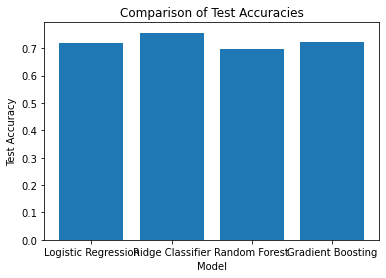

In [206]:
import matplotlib.pyplot as plt

# Test accuracies for the four models
test_accuracy = [fit_models1['lr'].score(X_test_new, y_test_new),
                 fit_models1['rc'].score(X_test_new, y_test_new),
                 fit_models1['rf'].score(X_test_new, y_test_new),
                 fit_models1['gb'].score(X_test_new, y_test_new)]

# Model names
model_names = ['Logistic Regression', 'Ridge Classifier',
               'Random Forest', 'Gradient Boosting']

# Plotting the bar graph
plt.bar(model_names, test_accuracy)
plt.xlabel('Model')
plt.ylabel('Test Accuracy')
plt.title('Comparison of Test Accuracies')

# Displaying the graph
plt.show()

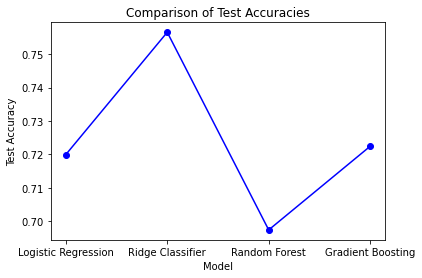

In [207]:
import matplotlib.pyplot as plt

# Test accuracies for the four models
test_accuracy = [fit_models1['lr'].score(X_test_new, y_test_new),
                 fit_models1['rc'].score(X_test_new, y_test_new),
                 fit_models1['rf'].score(X_test_new, y_test_new),
                 fit_models1['gb'].score(X_test_new, y_test_new)]

# Model names
model_names = ['Logistic Regression', 'Ridge Classifier',
               'Random Forest', 'Gradient Boosting']

# Plotting the graph
plt.plot(model_names, test_accuracy, marker='o', linestyle='-', color='blue')
plt.xlabel('Model')
plt.ylabel('Test Accuracy')
plt.title('Comparison of Test Accuracies')

# Displaying the graph
plt.show()

In [189]:
#7asab a7san wa7ed
with open('body_language.pkl', 'wb') as f:
    pickle.dump(fit_models1['rc'], f)

In [190]:
with open('body_language.pkl', 'rb') as f:
    model = pickle.load(f)

In [214]:
import mediapipe as mp
import cv2
cap = cv2.VideoCapture(0)
# Initiate holistic model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor Feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False        
        
        # Make Detections
        results = holistic.process(image)
        # print(results.face_landmarks)
        
        # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks
        
        # Recolor image back to BGR for rendering
        image.flags.writeable = True   
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # 1. Draw face landmarks
       # mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS, 
                             #    mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                              #   mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                               #  )
        
        # 2. Right hand
       # mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 #mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                                 #mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                                 #)

        # 3. Left Hand
        #mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 #mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                                 #mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                                 #)

        # 4. Pose Detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                 )
        # Export coordinates
        try:
            # Extract Pose landmarks
            pose = results.pose_landmarks.landmark
            pose_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in pose]).flatten())
            
            # Extract Face landmarks
            #face = results.face_landmarks.landmark
            #face_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in face]).flatten())
            
            # Concate rows
            row = pose_row
            
#             # Append class name 
#            row.insert(0, class_name)
            
#             # Export to CSV
#            with open('coordins.csv', mode='a', newline='') as f:        
#                csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
#                csv_writer.writerow(row) 

            # Make Detections
            X = pd.DataFrame([row])
            body_language_class1 = model.predict(X)[0]
            body_language_prob1 = model.predict_proba(X)[0]
            print(body_language_class1, body_language_prob1)
            
            # Grab ear coords
            coordins = tuple(np.multiply(
                            np.array(
                                (results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_EAR].x, 
                                 results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_EAR].y))
                        , [640,480]).astype(int))
            
            cv2.rectangle(image, 
                          (coordins[0], coordins[1]+5), 
                          (coordins[0]+len(body_language_class1)*20, coordins[1]-30), 
                          (245, 117, 16), -1)
            cv2.putText(image, body_language_class1, coordins, 
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
            # Get status box
            cv2.rectangle(image, (0,0), (250, 60), (245, 117, 16), -1)
            
            # Display Class
            cv2.putText(image, 'CLASS'
                        , (95,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
            cv2.putText(image, body_language_class1.split(' ')[0]
                        , (90,40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
            # Display Probability
            cv2.putText(image, 'PROB'
                        , (15,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
            cv2.putText(image, str(round(body_language_prob1[np.argmax(body_language_prob1)],2))
                        , (10,40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
        except:
            pass
                        
        cv2.imshow('Raw Webcam Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

In [198]:
!pip install pyautogui

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\hp\\anaconda3\\Lib\\site-packages\\~il\\_imaging.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.




  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for pyautogui: filename=PyAutoGUI-0.9.54-py3-no

In [213]:
cap = cv2.VideoCapture(0)

# Set screen resolution
screen_width, screen_height = 1920, 1080  # Update with your screen resolution

# Initiate holistic model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor Feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False        
        
        # Make Detections
        results = holistic.process(image)
        
        # Recolor image back to BGR for rendering
        image.flags.writeable = True   
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Draw pose landmarks
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                 )
        
        # Export coordinates
        try:
            # Extract Pose landmarks
            pose = results.pose_landmarks.landmark
            pose_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in pose]).flatten())
            
            # Concate rows
            row = pose_row
            
            # Make Detections
            X = pd.DataFrame([row])
            body_language_class1 = model.predict(X)[0]
            body_language_prob1 = model.predict_proba(X)[0]
            print(body_language_class1, body_language_prob1)
            
            # Grab ear coords
            coords = tuple(np.multiply(
                            np.array(
                                (results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_EAR].x, 
                                 results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_EAR].y))
                        , [screen_width, screen_height]).astype(int))
            
            cv2.rectangle(image, 
                          (coords[0], coords[1]+5), 
                          (coords[0]+len(body_language_class1)*20, coords[1]-30), 
                          (245, 117, 16), -1)
            cv2.putText(image, body_language_class1, coords, 
                        cv2.FONT_HERSHEY_SIMPLEX, screen_width/800, (255, 255, 255), int(screen_width/400), cv2.LINE_AA)
            
            # Get status box
            cv2.rectangle(image, (0,0), (int(screen_width/5), int(screen_height/6)), (245, 117, 16), -1)
            
            # Display Class
            cv2.putText(image, 'CLASS'
                        , (int(screen_width/25), int(screen_height/20)), cv2.FONT_HERSHEY_SIMPLEX, screen_width/1000, (0, 0, 0), int(screen_width/2000), cv2.LINE_AA)
            cv2.putText(image, body_language_class1.split(' ')[0]
                        , (int(screen_width/30), int(screen_height/12)), cv2.FONT_HERSHEY_SIMPLEX, screen_width/500, (255, 255, 255), int(screen_width/1000), cv2.LINE_AA)
            
            # Display Probability
            cv2.putText(image, 'PROB'
                        , (int(screen_width/150), int(screen_height/20)), cv2.FONT_HERSHEY_SIMPLEX, screen_width/1000, (0, 0, 0), int(screen_width/2000), cv2.LINE_AA)
            cv2.putText(image, str(round(body_language_prob1[np.argmax(body_language_prob1)],2))
                        , (int(screen_width/200), int(screen_height/12)), cv2.FONT_HERSHEY_SIMPLEX, screen_width/500, (255, 255, 255), int(screen_width/1000), cv2.LINE_AA)
            
        except:
            pass
                        
        cv2.imshow('Raw Webcam Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

In [222]:
import mediapipe as mp
import cv2

cap = cv2.VideoCapture(0)

# Initiate holistic model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor Feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False        
        
        # Make Detections
        results = holistic.process(image)
        # print(results.face_landmarks)
        
        # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks
        
        # Recolor image back to BGR for rendering
        image.flags.writeable = True   
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # 1. Draw face landmarks
       # mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS, 
                             #    mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                              #   mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                               #  )
        
        # 2. Right hand
       # mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 #mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                                 #mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                                 #)

        # 3. Left Hand
        #mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 #mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                                 #mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                                 #)

        # 4. Pose Detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                 )
        # Export coordinates
        try:
            # Extract Pose landmarks
            pose = results.pose_landmarks.landmark
            pose_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in pose]).flatten())
            landmarks = results.pose_landmarks.landmark
            # Extract Face landmarks
            #face = results.face_landmarks.landmark
            #face_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in face]).flatten())
            
            # Concate rows
            row = pose_row
            
#             # Append class name 
#            row.insert(0, class_name)
            
#             # Export to CSV
#            with open('coordins.csv', mode='a', newline='') as f:        
#                csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
#                csv_writer.writerow(row) 

            # Make Detections
            X = pd.DataFrame([pose_row])
            body_language_class1 = model1.predict(X)[0]
            body_language_prob1 = model1.predict_proba(X)[0]
            print(body_language_class1, body_language_prob1)
            
            # Grab ear coords
            coordins = tuple(np.multiply(
                            np.array(
                                (results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_EAR].x, 
                                 results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_EAR].y))
                        , [640,480]).astype(int))
            
            cv2.rectangle(image, 
                          (coordins[0], coordins[1]+5), 
                          (coordins[0]+len(body_language_class1)*20, coordins[1]-30), 
                          (245, 117, 16), -1)
            cv2.putText(image, body_language_class1, coordins, 
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
            # Get status box
            cv2.rectangle(image, (0,0), (250, 60), (245, 117, 16), -1)
            
            # Display Class
            cv2.putText(image, 'CLASS'
                        , (95,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
            cv2.putText(image, body_language_class1.split(' ')[0]
                        , (90,40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
            # Display Probability
            cv2.putText(image, 'PROB'
                        , (15,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
            cv2.putText(image, str(round(body_language_prob1[np.argmax(body_language_prob1)],2))
                        , (10,40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
        except:
            pass
                        
        cv2.imshow('Raw Webcam Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

Right [0.23137591 0.37769527 0.39092882]
Back arching [0.51381996 0.43789911 0.04828092]
Back arching [0.67207481 0.28878231 0.03914288]
Back arching [0.62734196 0.33290075 0.03975729]
Back arching [0.59164036 0.37348182 0.03487782]
Back arching [0.52927794 0.44912202 0.02160004]
Low hip mobility [0.45602745 0.52270156 0.02127099]
Right [0.06191151 0.0639744  0.87411409]
Right [0.05050924 0.04824946 0.90124129]
Right [0.15768585 0.01393908 0.82837507]
Right [0.04105867 0.04563908 0.91330226]
Right [0.04068245 0.04565698 0.91366057]
Right [0.04016019 0.04464037 0.91519944]
Right [0.04263016 0.04738588 0.90998397]
Right [0.41748101 0.02349543 0.55902356]
Right [0.38956533 0.04223816 0.5681965 ]
Right [0.28935691 0.06167961 0.64896347]
Right [0.28873385 0.06370007 0.64756608]
Right [0.36286049 0.06667615 0.57046336]
Right [0.32562443 0.04525859 0.62911698]
Back arching [0.4812242  0.07376065 0.44501514]
Back arching [0.49389718 0.0864651  0.41963772]
Back arching [0.47274626 0.09007863 0.